# Quadratic Programming

### Portfolio Optimization

**Objective**: Minimize portfolio risk (variance):

$$
\text{Minimize} \quad \frac{1}{2} 
\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\begin{bmatrix}
0.1 & 0.02 & 0.03 \\
0.02 & 0.08 & 0.01 \\
0.03 & 0.01 & 0.09
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}
$$

**Constraints**:

1. Target return:

$$
\begin{bmatrix} 0.1 & 0.2 & 0.15 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \geq 0.15
$$

2. Fully invested portfolio:

$$
\begin{bmatrix} 1 & 1 & 1 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = 1
$$

3. Non-negativity (no short selling):

$$
x_1, x_2, x_3 \geq 0
$$

Where:
- $Q = \begin{bmatrix}
0.1 & 0.02 & 0.03 \\
0.02 & 0.08 & 0.01 \\
0.03 & 0.01 & 0.09
\end{bmatrix}$ (covariance matrix),
- $\mu = \begin{bmatrix} 0.1 \\ 0.2 \\ 0.15 \end{bmatrix}$ (expected returns),
- $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$ (weights),
- $R = 0.15$ (target return),
- $\mathbf{e} = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$ (fully invested portfolio).

This solves for the optimal values of $x_1$, $x_2$, and $x_3$ to minimize risk.

In [1]:
import numpy as np
import cvxpy as cp
N = 3
Q = np.array([[0.1, 0.02, 0.03], [0.02, 0.08, 0.01], [0.03, 0.01, 0.09]])
mu = np.array([0.1, 0.2, 0.15])
R = 0.15
e = np.ones(N)
x = cp.Variable(N)
objective = cp.Minimize(0.5 * cp.quad_form(x, Q))
constraints = [
    mu @ x >= R,
    e @ x == 1,
    x >= 0
]
problem = cp.Problem(objective, constraints)
problem.solve()
print(x.value)
print(problem.value)

(CVXPY) Dec 01 07:09:44 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 01 07:09:44 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
[0.23287671 0.42465753 0.34246575]
0.021027397260273976


In [9]:
import cvxpy as cp
import numpy as np
N = 4
Q = np.array([[0.1, 0.02, 0.03, 0.04], 
              [0.02, 0.08, 0.01, 0.02], 
              [0.03, 0.01, 0.09, 0.03], 
              [0.04, 0.02, 0.03, 0.12]])  
mu = np.array([0.12, 0.18, 0.15, 0.2])  
R = 0.16  
e = np.ones(N)  
x = cp.Variable(N)
objective = cp.Minimize(0.5 * cp.quad_form(x, Q))
constraints = [mu @ x >= R, e @ x == 1, x >= 0]
problem = cp.Problem(objective, constraints)
problem.solve()
print(np.round(x.value, 2), np.round(problem.value * 2, 2), np.round(mu @ x.value, 2))

[0.18 0.39 0.3  0.14] 0.04 0.16


In [2]:
import cvxpy as cp
import numpy as np

# Example data (A matrix and b vector)
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12],
              [13, 14, 15]])

b = np.array([5, 11, 17, 23, 29])

# Define the variable to solve for
x = cp.Variable(3)

# Define the least squares objective (minimize ||Ax - b||^2)
objective = cp.Minimize(cp.norm(A @ x - b, 'fro')**2)

# Define the problem
problem = cp.Problem(objective)

# Solve the problem
problem.solve()

# Results
x_value = np.round(x.value, 3)  # Round the solution to 3 decimal places
print("Optimal solution:", x_value)


Optimal solution: [0.142 0.716 1.142]


### Quadratic Programming for Linear Regression

#### Canonical Form
The objective in linear regression is to minimize the squared error:

$$
\text{Minimize} \quad \frac{1}{2} \sum_{i=1}^{n} \left( \sum_{j=1}^{m} X_{ij} w_j - y_i \right)^2
$$

Here:
- \( X_{ij} \): Feature matrix element (input for sample \(i\), feature \(j\)),
- \( w_j \): Decision variable (coefficient for feature \(j\)),
- \( y_i \): Target value for sample \(i\),
- \( n \): Number of samples,
- \( m \): Number of features.

---

#### Matrix Form Derivation
Expanding the expression:

$$
\text{Minimize} \quad \frac{1}{2} \| \mathbf{X} \mathbf{w} - \mathbf{y} \|_2^2
$$

Expanding the norm:

$$
\| \mathbf{X} \mathbf{w} - \mathbf{y} \|_2^2 = (\mathbf{X} \mathbf{w} - \mathbf{y})^\top (\mathbf{X} \mathbf{w} - \mathbf{y})
$$

This simplifies to:

$$
\| \mathbf{X} \mathbf{w} - \mathbf{y} \|_2^2 = \mathbf{w}^\top \mathbf{X}^\top \mathbf{X} \mathbf{w} - 2 \mathbf{y}^\top \mathbf{X} \mathbf{w} + \mathbf{y}^\top \mathbf{y}
$$

The constant term \( \mathbf{y}^\top \mathbf{y} \) does not affect the optimization, so the objective becomes:

$$
\text{Minimize} \quad \frac{1}{2} \mathbf{w}^\top Q \mathbf{w} + \mathbf{c}^\top \mathbf{w}
$$

Where:
- \( Q = 2 \mathbf{X}^\top \mathbf{X} \) (Hessian matrix),
- \( \mathbf{c} = -2 \mathbf{X}^\top \mathbf{y} \) (gradient vector).

---

#### Correspondence to Code

In the provided code:
- \( \mathbf{A} \) corresponds to \( \mathbf{X} \),
- \( \mathbf{b} \) corresponds to \( \mathbf{y} \),
- \( Q = 2 \mathbf{A}^\top \mathbf{A} \),
- \( \mathbf{c} = -2 \mathbf{A}^\top \mathbf{b} \).

In [3]:
import numpy as np
import cvxpy as cp
from sklearn.linear_model import LinearRegression

# Generate larger synthetic data
np.random.seed(42)
A = np.random.randn(1000, 50)  # 1000 samples, 50 features
b = np.random.randn(1000)     # 1000 target values

# Quadratic Programming Solution
x_qp = cp.Variable(A.shape[1])
Q = 2 * A.T @ A
c = -2 * A.T @ b
objective = cp.Minimize(0.5 * cp.quad_form(x_qp, Q) + c.T @ x_qp)
problem = cp.Problem(objective)
problem.solve()

x_qp_solution = x_qp.value

# sklearn Linear Regression Solution
lr = LinearRegression(fit_intercept=False)  # No intercept for direct comparison
lr.fit(A, b)
x_sklearn_solution = lr.coef_

# Compare results
print("QP Solution (first 5 values):", x_qp_solution[:5])
print("Sklearn Solution (first 5 values):", x_sklearn_solution[:5])
print("Difference (Norm):", np.linalg.norm(x_qp_solution - x_sklearn_solution))

QP Solution (first 5 values): [-0.01850432  0.01357419  0.03624068 -0.04609446 -0.02115402]
Sklearn Solution (first 5 values): [-0.01850432  0.01357419  0.03624068 -0.04609446 -0.02115402]
Difference (Norm): 4.679186592322933e-16


### Support Vector Machine

### Soft-Margin SVM with Nonlinear Kernel

### Primal Problem

#### Objective:
Minimize the tradeoff between maximizing the margin and allowing margin violations:
$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i
$$
- \(w \in \mathbb{R}^d\): Weight vector of the hyperplane in the feature space.
- \(b \in \mathbb{R}\): Bias term.
- \(\xi_i \geq 0\): Slack variables for margin violations.
- \(C > 0\): Regularization parameter controlling the tradeoff.

#### Constraints:
1. Classification with Slack:
$$
y_i \big( w^\top \phi(x_i) + b \big) \geq 1 - \xi_i, \quad \forall i
$$
- \(\phi(x_i)\): Feature mapping to a higher-dimensional space (implicit in kernels).
- \(y_i \in \{-1, +1\}\): Class label for sample \(i\).

2. Non-Negative Slack Variables:
$$
\xi_i \geq 0, \quad \forall i
$$

---

### Dual Problem (Quadratic Programming)

#### Matrix Formulation:
Convert the primal to the dual using the Lagrange multipliers \(\alpha_i\).

#### Objective:
Maximize:
$$
\max_{\alpha} \mathbf{1}^\top \alpha - \frac{1}{2} \alpha^\top \mathbf{Q} \alpha
$$
Where:
- \(\alpha \in \mathbb{R}^n\): Vector of Lagrange multipliers.
- \(\mathbf{Q}_{ij} = y_i y_j K(x_i, x_j)\): Kernel matrix.

#### Constraints:
1. Non-Negativity:
$$
0 \leq \alpha_i \leq C, \quad \forall i
$$
2. Equality:
$$
\sum_{i=1}^n \alpha_i y_i = 0
$$

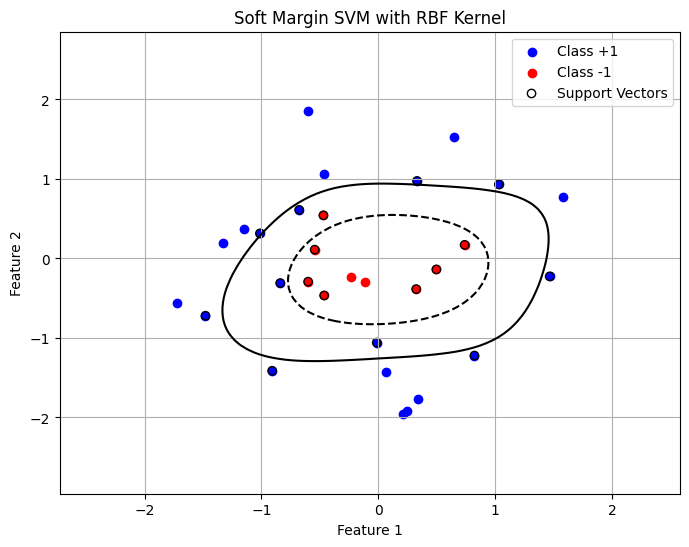

Alpha values: [ 5.46891402e-01 -3.51462767e-23  1.12282160e-21 -1.48748281e-22
  1.00000000e+00  1.00000000e+00  4.25546604e-22 -1.37132491e-22
  1.00000000e+00  8.28660983e-02  8.93622398e-01 -3.07998000e-22
  1.00000000e+00 -7.71879327e-23  1.00000000e+00  8.28871541e-23
  1.00000000e+00  1.44184985e-01  4.43266240e-22  5.36049690e-22
  1.00000000e+00  1.01901173e-21  7.30897326e-02 -2.32699002e-24
  3.85501855e-22  7.63747927e-01  1.00000000e+00  1.16876115e-01
  1.00000000e+00  1.00000000e+00]
Support vector indices: [ 0  4  5  8  9 10 12 14 16 17 20 22 25 26 27 28 29]
Number of support vectors: 17


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Generate synthetic data for a nonlinear problem
np.random.seed(42)
X = np.random.randn(30, 2)  # 30 data points, 2 features
y = np.sign(X[:, 0]**2 + X[:, 1]**2 - 0.7)  # Nonlinear decision boundary (circle)
y[y == 0] = 1  # Ensure all labels are ±1

# RBF kernel function
def rbf_kernel(x1, x2, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

# Compute the kernel matrix
n_samples = len(X)
gamma = 1.0  # RBF kernel hyperparameter
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X[i], X[j], gamma)

# Quadratic programming formulation
alpha = cp.Variable(n_samples)
objective = cp.Maximize(
    cp.sum(alpha) - 0.5 * cp.quad_form(cp.multiply(y, alpha), K)
)
constraints = [
    alpha >= 0,
    alpha <= 1,  # Upper bound for soft margin
    cp.sum(cp.multiply(alpha, y)) == 0
]
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract support vectors
alpha_val = alpha.value
support_vector_indices = np.where(alpha_val > 1e-5)[0]
support_vectors = X[support_vector_indices]

# Decision boundary visualization
x1_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_range = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
X_grid = np.c_[X1.ravel(), X2.ravel()]

# Decision function
def decision_function(X_new):
    result = np.zeros(X_new.shape[0])
    for i in range(X_new.shape[0]):
        result[i] = np.sum(
            alpha_val[support_vector_indices]
            * y[support_vector_indices]
            * np.array([rbf_kernel(X_new[i], sv, gamma) for sv in support_vectors])
        )
    return result

decision_values = decision_function(X_grid).reshape(X1.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], edgecolors='k', facecolors='none', label='Support Vectors')
plt.contour(X1, X2, decision_values, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.title('Soft Margin SVM with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Alpha values:", alpha_val)
print("Support vector indices:", support_vector_indices)
print("Number of support vectors:", len(support_vectors))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate synthetic data
np.random.seed(42)
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    class_sep=1.5, 
    random_state=42
)
y = 2 * y - 1  # Convert labels to {-1, +1}

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM with different regularization parameters (C)
C_values = [0.01, 0.1, 1, 10, 100]
decision_boundaries = []

for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_scaled, y)
    decision_boundaries.append(svm)

# Visualization
plt.figure(figsize=(12, 8))

# Plot original data
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='blue', label='Class +1')
plt.scatter(X_scaled[y == -1, 0], X_scaled[y == -1, 1], color='red', label='Class -1')

# Plot decision boundaries for different C values
x_vals = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
for i, svm in enumerate(decision_boundaries):
    coef = svm.coef_[0]
    intercept = svm.intercept_
    y_vals = -(coef[0] * x_vals + intercept) / coef[1]
    plt.plot(x_vals, y_vals, label=f'C = {C_values[i]}')

plt.title('Effect of Regularization Parameter C on Decision Boundary')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Print insights
print("Insights:")
print("1. Low C values (e.g., 0.01) result in wider margins but allow more misclassifications.")
print("2. High C values (e.g., 100) result in narrower margins but reduce misclassifications.")
print("3. Feature scaling ensures both features contribute equally to the SVM.")
